# Naive Bayes

## Write your id numbers and names here


1.   203458674 - Tomer Lev Lehman
2.   312141369 - Yiftach Savransky


## 1. Classifying Digits
In this part we will test digits classification on the MNIST dataset, using Bernoulli Naive Bayes (a generative model), in contrast to the Multivariate Logistic Regression (a discriminative model) we used before.

The MNIST dataset contains 28x28 grayscale images of handwritten digits between 0 and 9 (10 classes). For mathmatical analysis clarity, and for matching expected API, each image faltten to create a 1D array with 784 elements.

### Loading the MNIST dataset
Load the MNIST data set. The digits dataset is one of datasets scikit-learn comes with that do not require the downloading of any file from some external website. Use 
```
mnist = sklearn.datasets.fetch_mldata('MNIST original')
```
to fetch the original data. You may set the `data_home` to where you wish to download your data for caching. Each image is already transformed into a 1D integer array $x\in [0,255]^{784}$, and the corresponding label is an integer $y\in [0,9]$.

Plot a single sample of each digit as the original image, so you get a feeling how the data looks like.

Finally, divide your data into train and test sets, using 1/7 of the data for testing.

---
**Note 1:** Using `digits = sklearn.datasets.load_digits()` will only fetch a very small sample of the original set, with images resized to 8x8. This preprocessing of the data reduces dimensionality and gives invariance to small distortions - however, we will use the original data in this exercise. Feel free to test the proformance of the algorithms below on the preprocessed data as well.

**Note 2:**
Since ML-Data is deprecated, you may wish to use something like this:
>```
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(x_train.shape[0], 784)
x_test = x_test.reshape(x_test.shape[0], 784)
```

11493376/11490434 [==============================] - 0s 0us/step


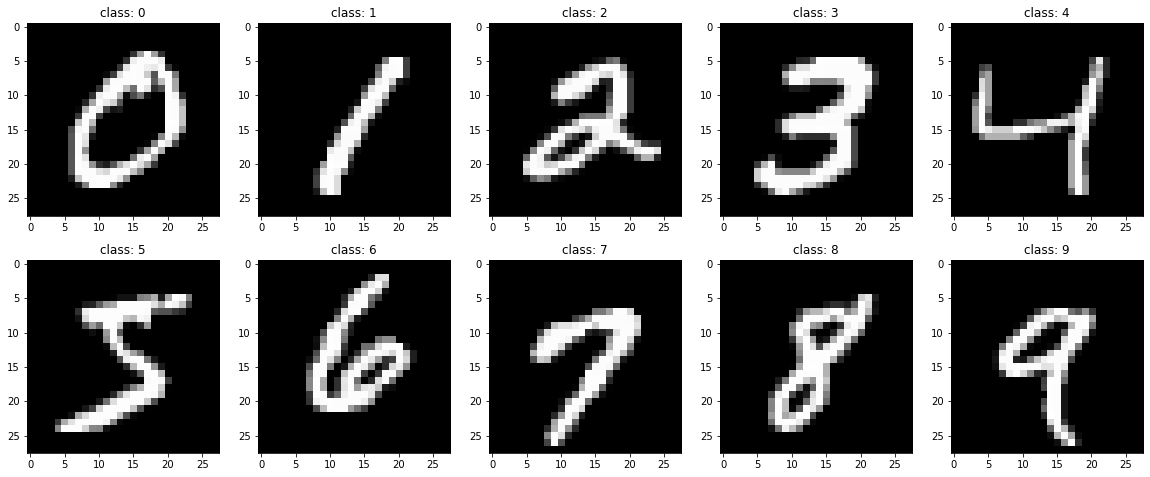

In [ ]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(x_train.shape[0], 784)
x_test = x_test.reshape(x_test.shape[0], 784)

import matplotlib.pyplot as plt
fig=plt.figure(figsize=(20.,8.))
for i in range(10):
  for sample_idx in range(len(y_train)):
    if y_train[sample_idx] == i:
      fig.add_subplot(2,5,i+1)
      plt.title("class: {}".format(i))
      plt.imshow(x_train[sample_idx].reshape(28,28), cmap='gray')
      break
plt.show()
  


### Bernoulli Naive Bayes
If we know how the digits are generated, then we know how to classify them (simply choose the digit class which will maximize the posterior probability) --- but which model should we use for describing the digits generation?

In this part we will try a very simplified model of digits creation (which is obviously not the same as the "real" model), using a Naive Bayes over an underlying Bernoulli distribution --- that is, we will assume that given a digit class, the pixels of the images are the result of independent coin flips, each with its own "head" probability.

Note that since we assume each pixl is either 0 (black) or 1 (white), we will need to adjust (preprocess) our data accrodingly (see below).

So, the model is stated as follows:
$$
\begin{align}
\text{Domain} && x \in \{0,1\}^{784} \\
\text{Prior} && \pi_j = \Pr(y=j) \\
\text{Likelihood} && P_j(x) = \Pr(x | y=j) \\
\end{align}
$$

Where for each $i\in 0\ldots 784$ it holds that
$$
P_{ji}(x_i) = \Pr(x_i | y=j) =
\begin{cases}
p_{ji} & \text{if } x_i=1 \\
1-p_{ji} & \text{if } x_i=0 \\
\end{cases}
$$


#### Question 1
Write the classification rule based on this Naive Bayes model. 
How would you esitmate each of the parameters of the model based on the trainning data? 


**Bonus:** Think of edge cases which may effect your estimator in an undesired way.

#### Answer 1
$C = argmax_{c_j \in C}P(c_j)*\Pi_iP(x_i|c_j) $

**estimation methods:**

**$P(c_j)$** will  be calculated as the Prior probabilty regardless of the pixels values. i.e. based only on the labels of the training set.

equals: $P(c_j)= \frac{|y: y\in trainingSetLabels ∧ y=j|}{|trainingSet|}$ 


**$P(x_i|c_j)$** is the probability of $x_i=1$ where the label y is $c_j$ 

will be calculated as follows:

count the number of $x_i$'s across the training set which are equal to 1 and their sample's respective label is $c_j$.
This count is divided by the number of samples in the training set that are labeled $c_j$. 


**Bonus:**

edge cases may effect our estimator and cause underflow that will hinder the model's performance. This would happen when one of the $P(x_i|c_j)$ or one of the $P(c_j)$ equals or is close to zero.


We will use the following log Likelihood formula:
$C = argmax_{c_j \in C}logP(c_j)+\Sigma_ilogP(x_i|c_j) $

 

#### Question 2
Run a Naive Bayes classifier on the training data and apply predictions on the test data. Use the [sklearn.naive_bayes.BernoulliNB](http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.BernoulliNB.html) implementation (see the [source code for sklearn.naive_bayes](https://github.com/scikit-learn/scikit-learn/blob/master/sklearn/naive_bayes.py) for details).

Remember we need to preprocess the data in this case such that each pixel would become either black (0) or white (1). For this, use the `binarize` parameter of the implementation. Set this value to $0$ (this is the default), which in this case would mean every pixel with non-zero value will be set to 1.

1. Plot the mean image of each class (estimated $\hat{p}_{ji}$) and generate one sample of each class (remember, you can do this since this is a generative model). You will need to access the `feature_log_prob_` attribute of the trained model.

2. Plot the confusion matrix of your classifier, as claculated on the test data (it is recommended to use [sklearn.metrics.confusion_matrix](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)). Calculate the total accuracy (fraction of correctly classified images), and summarize the results in your own words.

3. Think of a way you can find the optimal threshold of the binarization part. **There is no need to actually perform this task --- just describe what you would have done.**


#### Answer 2
**2.**
Model accuracy = 0.8417

As seen in the confusion matrix, we show that for most labels the model is good.
We also show that there are some classes that the model struglles more in classifying them. For example we see that the model mistakenly classifies 129 samples of 5 as 3, and 126 samples of 4 as 9.
This can be explaned by the fact that 5 is similar to 3 and 4 is similar to 9.

Moreover we can see that for some labels the model made zero errors in classifying them. For example the model made no error in classifying 0 as 1 and vice-versa. This can be explained by the fact that 0 is very different from 1.

**3.**
To find the optimal threshhold of the binarization part we can go over every value (or in binary search fashion) from 1 to 255(the possible pixel values), train the model for each value (using binarize with the vaule) and pick the value that maximizes the model accuracy.

predicts: 
[7 2 1 ... 9 8 6]
y_test: 
[7 2 1 ... 4 5 6]
diff: 
[0 0 0 ... 1 1 0]
err_rate: 
0.1587
model_acc: 
0.8413

Ploting the mean image of each class


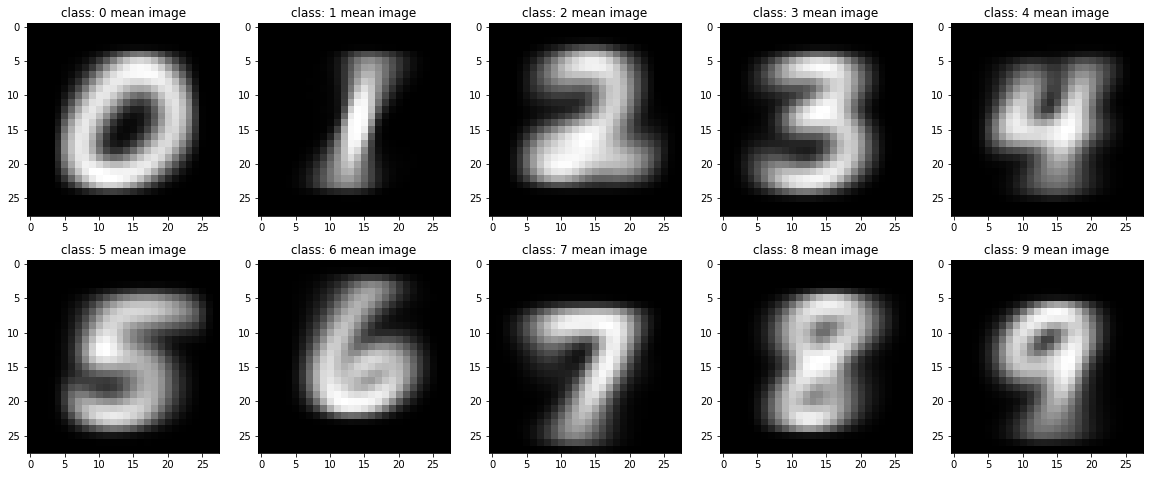

Ploting the samples of each class


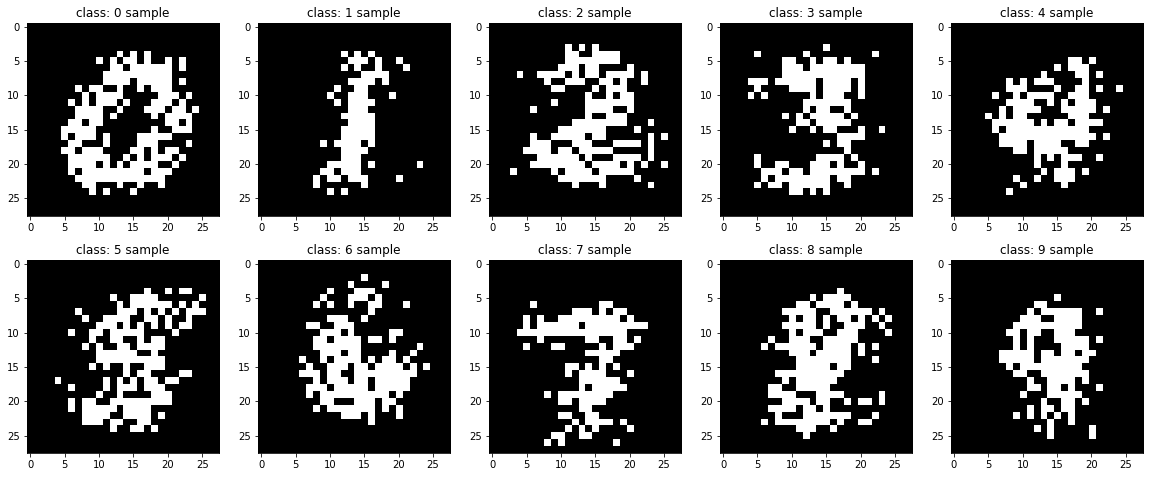

Plotting the confusion matrix


<Figure size 432x288 with 0 Axes>

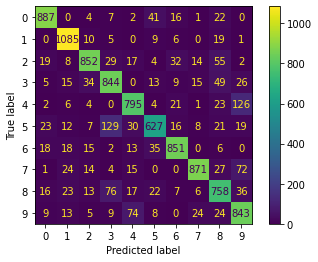

In [ ]:
from sklearn.naive_bayes import BernoulliNB
import numpy as np
# Model definition
NBmodel = BernoulliNB(binarize=0)
#Training
NBmodel.fit(x_train,y_train)

#prediction
predicts = NBmodel.predict(x_test)
#Calculating error rate 
diff = abs(y_test-predicts)
diff = np.asarray([0 if x==0 else 1 for x in diff])
err_rate = sum(diff)/len(y_test)
model_acc = NBmodel.score(x_test, y_test)

print("predicts: ")
print(predicts)
print("y_test: ")
print(y_test)
print("diff: ")
print(diff)
print("err_rate: ")
print(err_rate)
print("model_acc: ")
print(model_acc)


#Ploting the mean image of each class 
print("\nPloting the mean image of each class")
i_log_probs = NBmodel.feature_log_prob_
fig=plt.figure(figsize=(20.,8.))
for idx,class_j in enumerate(i_log_probs):
    #converting the log probapolities to pixel values
    i_j_pixels = [np.exp(i) for i in class_j]
    i_j_pixels = [255*i for i in i_j_pixels]
    #Ploting
    fig.add_subplot(2,5,idx+1)
    plt.title("class: {} mean image".format(idx))
    plt.imshow(np.asarray(i_j_pixels).reshape(28,28), cmap='gray')
plt.show()

#Ploting the samples of each class 
print("Ploting the samples of each class")
fig=plt.figure(figsize=(20.,8.))
for idx,class_j in enumerate(i_log_probs):
    #converting the log probapolities to pixel values
    i_j_pixels = [np.exp(i) for i in class_j]
    i_j_pixels = [np.random.binomial(size=1, n=1, p=i)[0] for i in i_j_pixels]
    #Ploting
    fig.add_subplot(2,5,idx+1)
    plt.title("class: {} sample".format(idx))
    plt.imshow(np.asarray(i_j_pixels).reshape(28,28), cmap='gray')
plt.show()

print("Plotting the confusion matrix")
from sklearn.metrics import plot_confusion_matrix
fig = plt.figure(601)
plot_confusion_matrix(NBmodel, x_test, y_test,values_format='d')
plt.show()

      
      

      

## 2. Classifing Text Documents using Multinomial Naive Bayes
In this exercise you will classify the "20 newsgroups" data set using your own naive bayes classifier and compare to the scikit learn built in version.

The 20 newsgroups dataset comprises around 18000 newsgroups posts on 20 topics split in two subsets: one for training (or development) and the other one for testing (or for performance evaluation). The split between the train and test set is based upon messages posted before and after a specific date.

### Your task
Implement the barebone class provided: `NaiveBayes(BaseEstimator, ClassifierMixin)` and implement its `fit`, `predict` and `predict_proba` methods.

Then follow next anlysis guidlinnes using the implemented class for train and test classifier:
* Load the **train** data using `from sklearn.datasets import fetch_20newsgroups`. remove headers, footers and quotes (see documentation)
* Use `sklearn.feature_extraction.text import CountVectorizer` to count words (stop_words='english')
* use `sklearn.pipeline.make_pipeline` to chain the vectroizer and model.
* note: limit the vocuabolary size if you suffer memory issues
* compare the accuracy over the **test** data. You can use `accuracy_score, classification_report`
* compare to the built in `sklearn.naive_bayes.MultinomialNB`
* compare to `TfidfVectorizer` preprocessing (you can use the built in model for doing the analysis)
* plot the learning curve - is the model in the bias or variance regime (you can use the built in model for doing the analysis)
* optimize performance in respect to vectorizer hyper parameters (e.g. max_features, max_df etc.).


**Question 2 answers**
We perform all the given tasks in the code below.

Regarding the accuracy comparance between our model and the built-in model using the CountVectorizer.
We implemented our model using equations documented in sklearn's MultinomialNB. Our model got a better score using alpha = 0.5 than the built-in model, when alpha was 1 we got a score identical to sklearn's implemented MultinomialNB.

Our model acheived accuracy score of 0.6583908656399363, whilst the built-in model acheived 0.6494954859267127.
The classification report shows similar results for both models and details various metrics for both models.

When using TfidfVectorizer, the built-in model acheived better results than the CountVectorizer preprocessor.

From the learning curve and the accuracy score we deduct that the built-in model suffers from high variance, because we can see that the training score, and cv score dont converge to the same value.

As for the best hyperparameters, we found that:
{'max_df': 0.12589254117941673, 'max_features': 30000, 'lowercase': True}
gives the best score: 0.683749336165693.
We got these values by runing a lot of different configurations and checking which permutation gives the best score.
The caluclation is commented-out in the code below because it takes a long time to run all configurations.
For the permutations we used a logarithmic scale from 0.1 to 1 for max_df in order to better cover the search space. For max_features we used [10000, 20000, 30000, 40000, 50000, 60000]

our score = 0.6583908656399363
our classification_report:
                          precision    recall  f1-score   support

             alt.atheism       0.53      0.49      0.51       319
           comp.graphics       0.55      0.73      0.62       389
 comp.os.ms-windows.misc       0.33      0.00      0.01       394
comp.sys.ibm.pc.hardware       0.51      0.74      0.61       392
   comp.sys.mac.hardware       0.65      0.66      0.66       385
          comp.windows.x       0.68      0.74      0.71       395
            misc.forsale       0.84      0.73      0.78       390
               rec.autos       0.75      0.73      0.74       396
         rec.motorcycles       0.82      0.73      0.77       398
      rec.sport.baseball       0.91      0.79      0.85       397
        rec.sport.hockey       0.59      0.87      0.70       399
               sci.crypt       0.70      0.74      0.72       396
         sci.electronics       0.67      0.54      0.60       393
                 

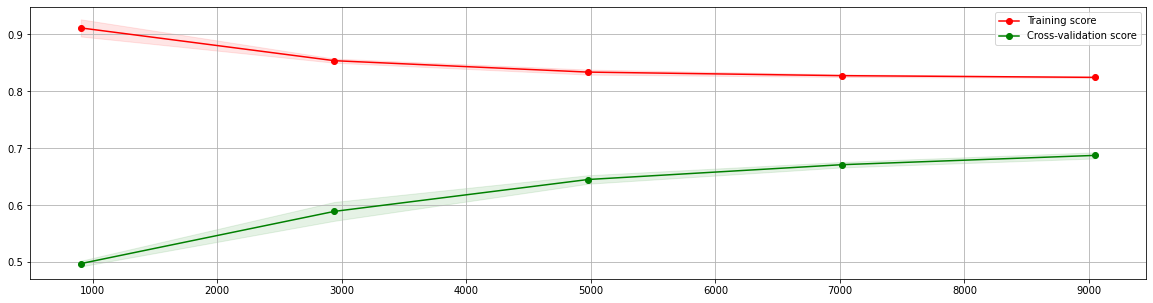

In [ ]:
from sklearn.base import BaseEstimator, ClassifierMixin
from collections import Counter
from scipy.sparse import csr_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score


class NaiveBayes(BaseEstimator, ClassifierMixin):
  
  def fit(self, x, y):
    # x is given as sparse matrix, convert to ndarray
    x = csr_matrix(x).toarray() 
    # seperate x to |C| matrix's i.e 1 matrix for each label in y.
    sorter = np.argsort(y)
    classes_sorted = y[sorter]
    splitter, = np.where(classes_sorted[:-1] != classes_sorted[1:])
    data_splitted = np.split(x[sorter], splitter + 1)
    # generate for each label j, a vector of N_y_i where N_y_i is the sum of apperances of word i in the samples of class j in the training set.
    n_y_i_s = np.asarray([np.sum(samples_from_class_j,axis=0) for samples_from_class_j in data_splitted])
    # generate a vector N of size |C| that for each entry i N[i] = sum of features in class i.
    N = np.sum(n_y_i_s, axis=1)

    # calculate a matrix of theta_hat, for each class j calculate a vector theta_hat_j = [(N_j_i + alpha) / (N[j] + alpha*n) for i in range(n)] where n is the number of features
    # alpha = 0.5 because it gave us a better score than 1, alpha is the smoothing prior
    # when alpha was 1 we got a score identical to sklearns implemented MultinomialNB
    alpha = 0.5
    n = x.shape[1]
    numerator = (n_y_i_s +  alpha * np.ones( n_y_i_s.shape))
    denom = (N + alpha*n * np.ones(N.shape)) 
    denom = np.ones([n,denom.shape[0]])*denom
    denom = np.transpose(denom)
    self.theta_hat = numerator / denom
    self.log_theta_hat = np.log(self.theta_hat)

    # calculate probaliblty of each class j.
    classes_counter = Counter(classes_sorted)
    self.y_prob = [value/y.shape[0] for _,value in sorted(list(classes_counter.items()))]
    self.y_log_prob = np.log(self.y_prob)
    self.classes_ = sorted(list(classes_counter.keys()))

  def predict_log_proba(self, x):
    if (self.y_prob is None and self.theta_hat is None):
      raise 
    # x is given as sparse matrix, convert to ndarray
    x = csr_matrix(x).toarray()

    # matrix implementation of NB log probabilty score.
    return np.matmul(x,np.transpose(self.log_theta_hat)) + np.ones((np.asarray(x).shape[0],self.y_log_prob.shape[0]))*self.y_log_prob

  def predict(self, x):
    # x is given as sparse matrix, convert to ndarray
    x = csr_matrix(x).toarray()
    log_prob = self.predict_log_proba(x)
    return np.argmax(log_prob, axis = 1)
    

from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer 
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report
from sklearn.model_selection import learning_curve

# fetch data
train_set = fetch_20newsgroups(subset='train', remove=('headers', 'footers', 'quotes'))
test_set = fetch_20newsgroups(subset='test', remove=('headers', 'footers', 'quotes'))

# Our predictor score and classification report
#  our alpha = 0.5 because it gave us a better score than 1, alpha is the smoothing prior
# when alpha was 1 we got a score identical to sklearns implemented MultinomialNB
our_pipe = make_pipeline(CountVectorizer(stop_words='english', max_features=50000), NaiveBayes())
our_pipe.fit(X=train_set.data, y=train_set.target)
y_pred = our_pipe.predict(X=test_set.data)
print('our score = {}'.format(accuracy_score(test_set.target, y_pred)))
print('our classification_report:')
print(classification_report(test_set.target, y_pred, target_names=test_set.target_names))

# built-in sklearn MultinomialNB score and classification report using CountVectorizer
sklearn_pipe = make_pipeline(CountVectorizer(stop_words='english', max_features=50000), MultinomialNB())
sklearn_pipe.fit(X=train_set.data, y=train_set.target)
sklearn_pred = sklearn_pipe.predict(X=test_set.data)
print('sklearn using CountVectorizer score = {}'.format(accuracy_score(test_set.target, sklearn_pred)))
print('sklearn using CountVectorizer classification_report:')
print(classification_report(test_set.target, sklearn_pred, target_names=test_set.target_names))

# built-in sklearn MultinomialNB score and classification report using TfidfVectorizer
sklearn_pipe_tfidf = make_pipeline(TfidfVectorizer(stop_words='english', max_features=50000), MultinomialNB())
sklearn_pipe_tfidf.fit(X=train_set.data, y=train_set.target)
sklearn_pred_tfidf = sklearn_pipe_tfidf.predict(X=test_set.data)
print('sklearn using TfidfVectorizer score: {}'.format(accuracy_score(test_set.target, sklearn_pred_tfidf)))
print('sklearn using TfidfVectorizer classification_report:')
print(classification_report(test_set.target, sklearn_pred_tfidf, target_names=test_set.target_names))


# calculate data for learning curve
train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(sklearn_pipe, X=train_set.data, y=train_set.target,
                       return_times=True)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)



# Plot learning curve

_, axes = plt.subplots(1, 1, figsize=(20, 5))
axes.grid()
axes.fill_between(train_sizes, train_scores_mean - train_scores_std,
                      train_scores_mean + train_scores_std, alpha=0.1,
                      color="r")
axes.fill_between(train_sizes, test_scores_mean - test_scores_std,
                      test_scores_mean + test_scores_std, alpha=0.1,
                      color="g")
axes.plot(train_sizes, train_scores_mean, 'o-', color="r",
              label="Training score")
axes.plot(train_sizes, test_scores_mean, 'o-', color="g",
              label="Cross-validation score")
axes.legend(loc="best")
plt.show()


# define vectorizer's hyper parameter search space
max_df = np.logspace(0.1,1,endpoint=True,num=10)/10
max_feat = range(10000, 60000, 10000)
lowercase = [True, False]

# for each combination of hyper parameters, calculate the score and print best parameter combination when done
# remove comment from next section to calculate best hyper-paramters.
# best_score = 0
# best_hp = {}
# for mxdf in max_df:
#   for mxft in max_feat:
#     for case in lowercase:
#       sklearn_pipe_tfidf = make_pipeline(TfidfVectorizer(stop_words='english', max_features=mxft, max_df=mxdf, lowercase=case), MultinomialNB())
#       sklearn_pipe_tfidf.fit(X=train_set.data, y=train_set.target)
#       sklearn_pred_tfidf = sklearn_pipe_tfidf.predict(X=test_set.data)
#       score = accuracy_score(test_set.target, sklearn_pred_tfidf)
#       if score > best_score:
#         best_score = score
#         best_hp = {
#             'max_df' : mxdf,
#             'max_features': mxft,
#             'lowercase': case
#         }
# print("the best hyper parameters:")
# print(best_hp)
# print('best_score: {}'.format(best_score))





### Bonus I (10 points)
#### Model interpretability
Find the most important features for a **specific** decision of a NB classifier.
Because the model has learned the prior $p(x_i|c)$ during the training, the contribution of an individual feature value can be easily measured by the posterior, $p(c|x_i)=p(c)p(x_i|c)/p(x_i)$
Implement a function which gets a scikit-learn NB model as input and returns $P(c|x_i)$:

`def calc_p_c_given_xi(model)`

Hint: Use the following model properties:

* `model.class_log_prior_`
* `model.feature_log_prob_`

Note: remember these are logs and you need to use np.exp and normalize to get $P(c|x_i)$ 
Another hint: use numpy built-in broadcasting property.

* Use the interpretation to examine errors of the classifier where $\hat{c}\ne c$. Which top words support the correct class and which support the wrong class? You can use the `print_txt` below to color words.

**Bonus 1 answer**

As shown below, after calculating the posterior class probabilties, we choose one sample on witch the model predicted the wrong label.
We can see that there are many similar top words regarding the actual class and the predicted class that are the same. This can explain why the model was mistaken on the sample, for the model those 2 classes are close(based on their respective important features).



In [ ]:
import string
def print_txt(txt, hot, cold):
  """
  print the text, coloring hot and cold words with colors
  """
  cold_color='\x1b[41;37m{}\x1b[0m'
  hot_color='\x1b[42;37m{}\x1b[0m'
  hot_words = []
  cold_words = []
  def color(token):
    lower = str(token).lower()
    lower = lower.replace('\t','').replace('\n','')
    lower = lower.translate(string.punctuation)
    if (lower in hot) and (lower in cold):
      return mid_color.format(token)
    elif lower in hot:
      hot_words.append(lower)
      return hot_color.format(token)
    elif lower in cold:
      cold_words.append(lower)
      return cold_color.format(token)
    else:
      return token
  colored_txt = " ".join([color(token) for token in txt.split(' ')])
  print(colored_txt)
  return hot_words, cold_words
print_txt('This word support the first class but this the other', ['word'],['other'])

This word support the first class but this the other


(['word'], ['other'])

In [ ]:
# Implementationn for 1st bonus
def calc_p_c_given_xi(model):
  # classes prior probability
  class_prior_prob = np.exp(model.class_log_prior_)
  # words conditional probability
  features_cond_prob = np.exp(model.feature_log_prob_)
  # Words prior probability - calculated as the sum of the conditional probabilities across classes
  feature_prior_prob = np.sum(features_cond_prob, axis=0)
  # class postirior probability
  class_postirior_prob = (features_cond_prob*class_prior_prob.reshape(class_prior_prob.shape[0],1))/feature_prior_prob
  return class_postirior_prob

# extracts the top thershold percent words for every class
def most_important_features(class_postirior_prob, threshhold=0.3):
  features_num = int(class_postirior_prob.shape[1]*threshhold) 
  return np.asarray([np.argpartition(class_postirior_prob[class_j], -features_num)[-features_num:] for class_j in range(class_postirior_prob.shape[0]) ])

# extracts the bottom thershold percent words for every class
def least_important_features(class_postirior_prob, threshhold=0.3):
  features_num = int(class_postirior_prob.shape[1]*threshhold) 
  return np.asarray([np.argpartition(class_postirior_prob[class_j], features_num)[:features_num] for class_j in range(class_postirior_prob.shape[0]) ])

# create a model
vectorizer = CountVectorizer(stop_words='english', max_features=500)
model = MultinomialNB()

our_pipe = make_pipeline(vectorizer,model)
our_pipe.fit(train_set.data, train_set.target)

y_pred = our_pipe.predict(X=test_set.data)

# retreiving wrongly predicted samples
correct = y_pred == test_set.target
correct_indexes = []
wrong_indexes = []
for idx,val in enumerate(correct):
  if val:
    correct_indexes.append(idx)
  else:
    wrong_indexes.append(idx)

features_names = np.asarray(vectorizer.get_feature_names())
posirior_class_prob = calc_p_c_given_xi(model)

print('Printing the text, with the most and least important words regarding the real label')
most_words = features_names[most_idx[test_set.target[wrong_indexes[1]]]]
least_idx = least_important_features(posirior_class_prob)
least_words = features_names[least_idx[test_set.target[wrong_indexes[1]]]]
hot_words, cold_words  = print_txt(train_set.data[wrong_indexes[1]],most_words,least_words)

print('\n\n-----------------\n\n')

print('Printing the text, with the most and least important words regarding the predicted label')
most_words = features_names[most_idx[y_pred[wrong_indexes[1]]]]
least_idx = least_important_features(posirior_class_prob)
least_words = features_names[least_idx[y_pred[wrong_indexes[1]]]]
hot_words1, cold_words1 = print_txt(train_set.data[wrong_indexes[1]],most_words,least_words)
print('\nHot words in the example, regarding the true label')
print(sorted(hot_words))

print('\nHot words in the example, regarding the predicted label')
print(sorted(hot_words1))

print('\nCold words in the example, regarding the true label')
print(sorted(cold_words))

print('\nCold words in the example, regarding the predicted label')
print(sorted(cold_words1))



Printing the text, with the most and least important words regarding the real label
well folks, my mac plus finally gave up the ghost this weekend after
starting life as a 512k way back in 1985.  sooo, i'm in the market for a
new machine a bit sooner than i intended to be...

i'm looking into picking up a powerbook 160 or maybe 180 and have a bunch
of questions that (hopefully) somebody can answer:

* does anybody know any dirt on when the next round of powerbook
introductions are expected?  i'd heard the 185c was supposed to make an
appearence "this summer" but haven't heard anymore on it - and since i
don't have access to macleak, i was wondering if anybody out there had
more info...

* has anybody heard rumors about price drops to the powerbook line like the
ones the duo's just went through recently?

* what's the impression of the display on the 180?  i could probably swing
a 180 if i got the 80Mb disk rather than the 120, but i don't really have
a feel for how much "better" the di

### Bonus II (5 points)
#### How can you correct the analyzed error?

To read more about model interpretation, see the blogpost below and the tutorial:
* https://lilianweng.github.io/lil-log/2017/08/01/how-to-explain-the-prediction-of-a-machine-learning-model.html
* https://github.com/chanansh/right_but_why

**Answer for 2nd bonus**

We can draw several conclusions from analyzing the model interpretation.
For one we see that the model 'puts a lot of weight' on words which we as humans can determine they are unsignificant to the topic of the article.
For example in the abovve printed sample we notice for both classes(real label and predicted) we see that the model gives significace to word such as 'does', 'real', 'really', 'way'. These are words that we as humans can attempt to determine they are unimportant for predicting the class.

To really try and improve the performance of the model, we can let an expert review the significant words according to the model, and let him construct a list of words that the model finds siignificant but he does not. We can add this list to the list of stop words and by doing that the model will ignore them.

This procces should improve the model's accuracy based on the interpretation.